# *** Exploratory Data Analysis 




# Libraries

In [ ]:
%matplotlib inline
#!pip install dmba
#from dmba import plotDecisionTree, classificationSummary, regressionSummary

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm


from pathlib import Path
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa import tsatools

from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.decomposition import PCA
from sklearn import preprocessing

# Importing Dataset

In [ ]:
#Import Dataset
apb_df = pd.read_csv ('Apartment_Building _Evaluation.csv')
apb_df.head()

,_id,RSN,YEAR_REGISTERED,YEAR_EVALUATED,YEAR_BUILT,PROPERTY_TYPE,WARD,WARDNAME,SITE_ADDRESS,CONFIRMED_STOREYS,...,EXTERIOR_WALKWAYS,BALCONY_GUARDS,WATER_PEN_EXT_BLDG_ELEMENTS,PARKING_AREA,OTHER_FACILITIES,GRID,LATITUDE,LONGITUDE,X,Y
0,1026230,4156313,2017.0,NaN,1965.0,TCHC,20,Scarborough Southwest,3181 EGLINTON AVE E,7,...,3.0,2.0,3.0,3.0,4.0,E2027,43.742629,-79.219653,327364.758,4844556.449
1,1026231,4153980,2017.0,NaN,1959.0,PRIVATE,8,Eglinton-Lawrence,665 ROSELAWN AVE,5,...,4.0,4.0,3.0,4.0,NaN,N0833,43.705178,-79.425108,310820.120,4840361.543
2,1026232,4155584,2017.0,NaN,1970.0,TCHC,22,Scarborough-Agincourt,365 BAY MILLS BLVD,13,...,5.0,5.0,4.0,5.0,5.0,E2226,43.781240,-79.300842,320815.234,4848827.170
3,1026233,4155686,2017.0,NaN,2003.0,SOCIAL HOUSING,8,Eglinton-Lawrence,651 LAWRENCE AVE W,3,...,4.0,NaN,5.0,5.0,4.0,N0827,43.716104,-79.442901,309385.499,4841573.160
4,1026234,4848750,2021.0,NaN,1954.0,PRIVATE,19,Beaches-East York,996 O'CONNOR DR,3,...,3.0,NaN,3.0,3.0,NaN,S1921,43.709175,-79.310572,320050.275,4840819.291


•	Data Structure

In [ ]:
apb_df.shape

(9930, 40)

In [ ]:
#dateset info
apb_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9930 entries, 0 to 9929
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   _id                          9930 non-null   int64  
 1   RSN                          9930 non-null   int64  
 2   YEAR_REGISTERED              9679 non-null   float64
 3   YEAR_EVALUATED               9749 non-null   float64
 4   YEAR_BUILT                   9889 non-null   float64
 5   PROPERTY_TYPE                9930 non-null   object 
 6   WARD                         9930 non-null   int64  
 7   WARDNAME                     9930 non-null   object 
 8   SITE_ADDRESS                 9930 non-null   object 
 9   CONFIRMED_STOREYS            9930 non-null   int64  
 10  CONFIRMED_UNITS              9930 non-null   int64  
 11  EVALUATION_COMPLETED_ON      9930 non-null   object 
 12  SCORE                        9930 non-null   int64  
 13  RESULTS_OF_SCORE  

# Data type

In [ ]:
ignore = ['_id','RSN','YEAR_REGISTERED','YEAR_EVALUATED','YEAR_BUILT','WARDNAME','SITE_ADDRESS','RESULTS_OF_SCORE','LAUNDRY_ROOMS', 
          'GARBAGE_CHUTE_ROOMS', 'ELEVATORS', 'STORAGE_AREAS_LOCKERS','GRID',
           'BALCONY_GUARDS','PARKING_AREA','OTHER_FACILITIES', 'LATITUDE', 'LONGITUDE', 'X', 'Y'] 

apb = apb_df.drop(columns=ignore) 

In [ ]:
apb.columns

Index(['PROPERTY_TYPE', 'WARD', 'CONFIRMED_STOREYS', 'CONFIRMED_UNITS',
       'EVALUATION_COMPLETED_ON', 'SCORE', 'NO_OF_AREAS_EVALUATED',
       'ENTRANCE_LOBBY', 'ENTRANCE_DOORS_WINDOWS', 'SECURITY', 'STAIRWELLS',
       'INTERNAL_GUARDS_HANDRAILS', 'GARBAGE_BIN_STORAGE_AREA',
       'INTERIOR_WALL_CEILING_FLOOR', 'INTERIOR_LIGHTING_LEVELS', 'GRAFFITI',
       'EXTERIOR_CLADDING', 'EXTERIOR_GROUNDS', 'EXTERIOR_WALKWAYS',
       'WATER_PEN_EXT_BLDG_ELEMENTS'],
      dtype='object')

•	Data Quality

In [ ]:
#duplicate rows
apb.duplicated().sum()  

103

In [ ]:
#missing value
apb.isnull().sum()  

PROPERTY_TYPE                   0
WARD                            0
CONFIRMED_STOREYS               0
CONFIRMED_UNITS                 0
EVALUATION_COMPLETED_ON         0
SCORE                           0
NO_OF_AREAS_EVALUATED           0
ENTRANCE_LOBBY                  1
ENTRANCE_DOORS_WINDOWS          1
SECURITY                        2
STAIRWELLS                      1
INTERNAL_GUARDS_HANDRAILS       1
GARBAGE_BIN_STORAGE_AREA        4
INTERIOR_WALL_CEILING_FLOOR     1
INTERIOR_LIGHTING_LEVELS        1
GRAFFITI                       16
EXTERIOR_CLADDING               1
EXTERIOR_GROUNDS               15
EXTERIOR_WALKWAYS               6
WATER_PEN_EXT_BLDG_ELEMENTS     5
dtype: int64

In [ ]:
#removing missing value
apb=apb.dropna()

In [ ]:
apb.isnull().sum()

PROPERTY_TYPE                  0
WARD                           0
CONFIRMED_STOREYS              0
CONFIRMED_UNITS                0
EVALUATION_COMPLETED_ON        0
SCORE                          0
NO_OF_AREAS_EVALUATED          0
ENTRANCE_LOBBY                 0
ENTRANCE_DOORS_WINDOWS         0
SECURITY                       0
STAIRWELLS                     0
INTERNAL_GUARDS_HANDRAILS      0
GARBAGE_BIN_STORAGE_AREA       0
INTERIOR_WALL_CEILING_FLOOR    0
INTERIOR_LIGHTING_LEVELS       0
GRAFFITI                       0
EXTERIOR_CLADDING              0
EXTERIOR_GROUNDS               0
EXTERIOR_WALKWAYS              0
WATER_PEN_EXT_BLDG_ELEMENTS    0
dtype: int64

Manipuling Variables

In [ ]:
#dataset info
apb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9897 entries, 0 to 9929
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   PROPERTY_TYPE                9897 non-null   object 
 1   WARD                         9897 non-null   int64  
 2   CONFIRMED_STOREYS            9897 non-null   int64  
 3   CONFIRMED_UNITS              9897 non-null   int64  
 4   EVALUATION_COMPLETED_ON      9897 non-null   object 
 5   SCORE                        9897 non-null   int64  
 6   NO_OF_AREAS_EVALUATED        9897 non-null   int64  
 7   ENTRANCE_LOBBY               9897 non-null   float64
 8   ENTRANCE_DOORS_WINDOWS       9897 non-null   float64
 9   SECURITY                     9897 non-null   float64
 10  STAIRWELLS                   9897 non-null   float64
 11  INTERNAL_GUARDS_HANDRAILS    9897 non-null   float64
 12  GARBAGE_BIN_STORAGE_AREA     9897 non-null   float64
 13  INTERIOR_WALL_CEIL

In [ ]:
apb[['ENTRANCE_LOBBY', 'ENTRANCE_DOORS_WINDOWS', 'SECURITY', 'STAIRWELLS', 
     'INTERNAL_GUARDS_HANDRAILS', 'GARBAGE_BIN_STORAGE_AREA', 'INTERIOR_WALL_CEILING_FLOOR',
     'INTERIOR_LIGHTING_LEVELS', 'GRAFFITI', 'EXTERIOR_CLADDING', 'EXTERIOR_GROUNDS', 'EXTERIOR_WALKWAYS', 
     'WATER_PEN_EXT_BLDG_ELEMENTS']] =apb[['ENTRANCE_LOBBY', 'ENTRANCE_DOORS_WINDOWS', 'SECURITY', 'STAIRWELLS'
     , 'INTERNAL_GUARDS_HANDRAILS', 'GARBAGE_BIN_STORAGE_AREA', 'INTERIOR_WALL_CEILING_FLOOR',
      'INTERIOR_LIGHTING_LEVELS', 'GRAFFITI', 'EXTERIOR_CLADDING', 'EXTERIOR_GROUNDS', 'EXTERIOR_WALKWAYS', 
      'WATER_PEN_EXT_BLDG_ELEMENTS']].astype("category")

In [ ]:
apb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9897 entries, 0 to 9929
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   PROPERTY_TYPE                9897 non-null   object  
 1   WARD                         9897 non-null   int64   
 2   CONFIRMED_STOREYS            9897 non-null   int64   
 3   CONFIRMED_UNITS              9897 non-null   int64   
 4   EVALUATION_COMPLETED_ON      9897 non-null   object  
 5   SCORE                        9897 non-null   int64   
 6   NO_OF_AREAS_EVALUATED        9897 non-null   int64   
 7   ENTRANCE_LOBBY               9897 non-null   category
 8   ENTRANCE_DOORS_WINDOWS       9897 non-null   category
 9   SECURITY                     9897 non-null   category
 10  STAIRWELLS                   9897 non-null   category
 11  INTERNAL_GUARDS_HANDRAILS    9897 non-null   category
 12  GARBAGE_BIN_STORAGE_AREA     9897 non-null   category
 13  INT

In [ ]:
apb["EVALUATION_COMPLETED_ON"]=pd.to_datetime(apb['EVALUATION_COMPLETED_ON'], format='%Y/%m/%d')

In [ ]:
apb.head()

,PROPERTY_TYPE,WARD,CONFIRMED_STOREYS,CONFIRMED_UNITS,EVALUATION_COMPLETED_ON,SCORE,NO_OF_AREAS_EVALUATED,ENTRANCE_LOBBY,ENTRANCE_DOORS_WINDOWS,SECURITY,STAIRWELLS,INTERNAL_GUARDS_HANDRAILS,GARBAGE_BIN_STORAGE_AREA,INTERIOR_WALL_CEILING_FLOOR,INTERIOR_LIGHTING_LEVELS,GRAFFITI,EXTERIOR_CLADDING,EXTERIOR_GROUNDS,EXTERIOR_WALKWAYS,WATER_PEN_EXT_BLDG_ELEMENTS
0,TCHC,20,7,103,2022-06-29,53,19,2.0,3.0,2.0,2.0,3.0,2.0,2.0,3.0,2.0,3.0,3.0,3.0,3.0
1,PRIVATE,8,5,87,2022-06-22,80,19,4.0,4.0,3.0,3.0,4.0,4.0,4.0,4.0,5.0,3.0,5.0,4.0,3.0
2,TCHC,22,13,186,2022-06-13,93,19,5.0,5.0,5.0,5.0,5.0,4.0,3.0,5.0,5.0,4.0,4.0,5.0,4.0
3,SOCIAL HOUSING,8,3,24,2022-06-13,85,15,4.0,4.0,5.0,3.0,4.0,3.0,5.0,4.0,5.0,5.0,4.0,4.0,5.0
4,PRIVATE,19,3,18,2022-06-10,65,15,3.0,3.0,4.0,3.0,4.0,3.0,3.0,4.0,5.0,3.0,3.0,3.0,3.0


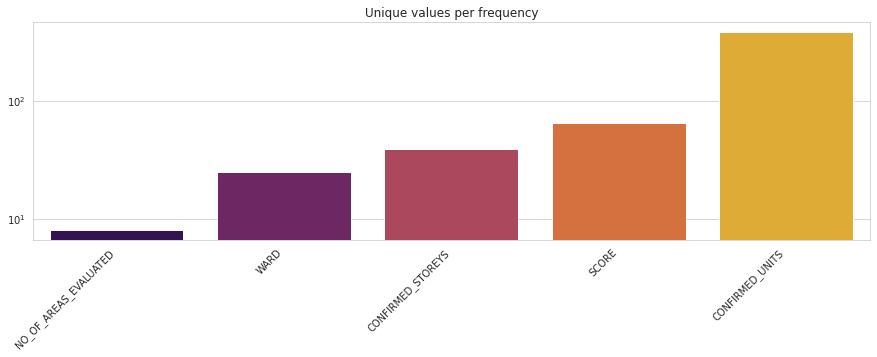

In [ ]:
# For each numerical feature compute number of unique entries
unique_values = apb.select_dtypes(include='number').nunique().sort_values()
plt.figure(figsize=(15, 4))
sns.set_style('whitegrid')
g = sns.barplot(x=unique_values.index, y=unique_values, palette='inferno')
g.set_yscale("log")
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set_title('Unique values per frequency')
plt.show()

Time_series

In [ ]:
time_series=apb[["EVALUATION_COMPLETED_ON","SCORE"]]

In [ ]:
time_series =time_series.groupby("EVALUATION_COMPLETED_ON")["SCORE"].mean().reset_index()

In [ ]:
time_series.head()

,EVALUATION_COMPLETED_ON,SCORE
0,2017-09-13,68.000000
1,2017-09-14,69.833333
2,2017-09-15,86.500000
3,2017-09-18,71.500000
4,2017-09-19,60.600000


In [ ]:
time_series["date"]=time_series["EVALUATION_COMPLETED_ON"]
time_series = time_series.set_index('EVALUATION_COMPLETED_ON')
time_series.index

DatetimeIndex(['2017-09-13', '2017-09-14', '2017-09-15', '2017-09-18',
               '2017-09-19', '2017-09-21', '2017-09-28', '2017-10-03',
               '2017-10-04', '2017-10-05',
               ...
               '2022-05-24', '2022-05-25', '2022-05-26', '2022-05-27',
               '2022-05-28', '2022-05-31', '2022-06-10', '2022-06-13',
               '2022-06-22', '2022-06-29'],
              dtype='datetime64[ns]', name='EVALUATION_COMPLETED_ON', length=463, freq=None)

In [ ]:
time_series.head()

,SCORE,date
EVALUATION_COMPLETED_ON,,
2017-09-13,68.000000,2017-09-13
2017-09-14,69.833333,2017-09-14
2017-09-15,86.500000,2017-09-15
2017-09-18,71.500000,2017-09-18
2017-09-19,60.600000,2017-09-19


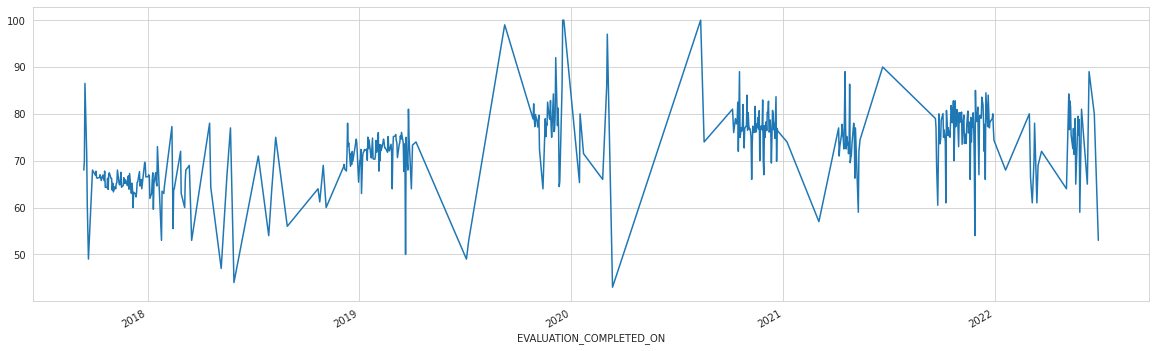

In [ ]:
time_series.SCORE.plot(figsize=(20, 6))
plt.show()
#score behavior

In [ ]:
#description of the data in the DataFrame
apb.describe()

,WARD,CONFIRMED_STOREYS,CONFIRMED_UNITS,SCORE,NO_OF_AREAS_EVALUATED
count,9897.000000,9897.000000,9897.000000,9897.000000,9897.000000
mean,10.853390,7.623219,88.240679,72.437102,17.166616
std,6.318563,6.199851,95.077159,10.078066,1.654599
min,1.000000,3.000000,10.000000,20.000000,13.000000
25%,5.000000,3.000000,24.000000,65.000000,16.000000
50%,11.000000,4.000000,49.000000,73.000000,17.000000
75%,15.000000,10.000000,120.000000,80.000000,19.000000
max,25.000000,51.000000,793.000000,100.000000,20.000000


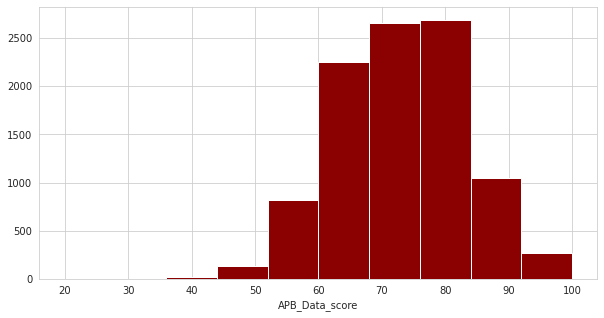

In [ ]:
#Data_Distribution_score
plt.figure(figsize=(10,5))
plt.hist(apb.SCORE,facecolor="darkred")
plt.xlabel("APB_Data_score")
plt.show()

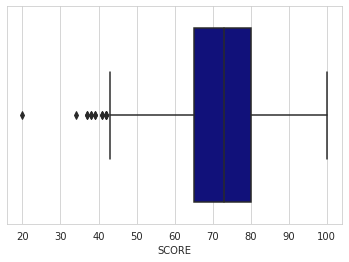

In [ ]:
# Outliers
sns.boxplot(x=apb.SCORE,color="darkblue")
plt.show()

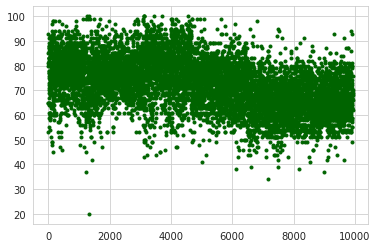

In [ ]:
#Range between (100 and 30)
plt.plot(apb.SCORE,".",color="darkgreen")

In [ ]:
apb_outliers=apb[(apb.SCORE< 100) & (apb.SCORE> 30)]

In [ ]:
apb_outliers.describe()

,WARD,CONFIRMED_STOREYS,CONFIRMED_UNITS,SCORE,NO_OF_AREAS_EVALUATED
count,9888.000000,9888.000000,9888.000000,9888.000000,9888.000000
mean,10.851638,7.611246,88.093345,72.420105,17.165150
std,6.319783,6.179946,94.894419,10.038264,1.654528
min,1.000000,3.000000,10.000000,34.000000,13.000000
25%,5.000000,3.000000,24.000000,65.000000,16.000000
50%,11.000000,4.000000,49.000000,73.000000,17.000000
75%,15.000000,10.000000,120.000000,80.000000,18.000000
max,25.000000,51.000000,793.000000,99.000000,20.000000


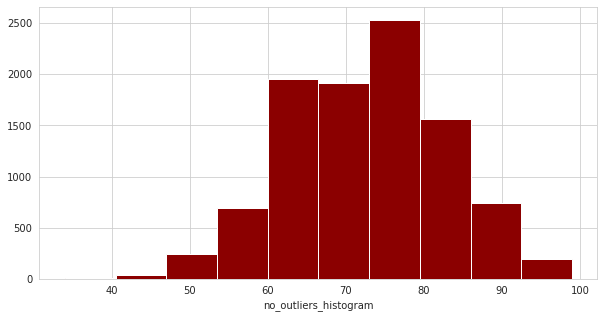

In [ ]:
#no_outliers_histogram
plt.figure(figsize=(10,5))
plt.hist(apb_outliers.SCORE,facecolor="darkred")
plt.xlabel("no_outliers_histogram")
plt.show()

Correlation

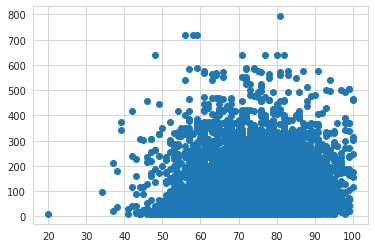

In [ ]:
plt.scatter(apb.SCORE,apb.CONFIRMED_UNITS)
plt.show()

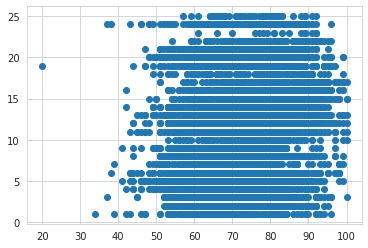

In [ ]:
plt.scatter(apb.SCORE,apb.WARD	)
plt.show()

In [ ]:
apb_corr=apb.corr()
apb_corr.head()

,WARD,CONFIRMED_STOREYS,CONFIRMED_UNITS,SCORE,NO_OF_AREAS_EVALUATED
WARD,1.000000,0.079716,0.105853,0.142769,0.142324
CONFIRMED_STOREYS,0.079716,1.000000,0.864087,0.144640,0.592039
CONFIRMED_UNITS,0.105853,0.864087,1.000000,0.120170,0.593006
SCORE,0.142769,0.144640,0.120170,1.000000,0.247066
NO_OF_AREAS_EVALUATED,0.142324,0.592039,0.593006,0.247066,1.000000


HEAT_MAP

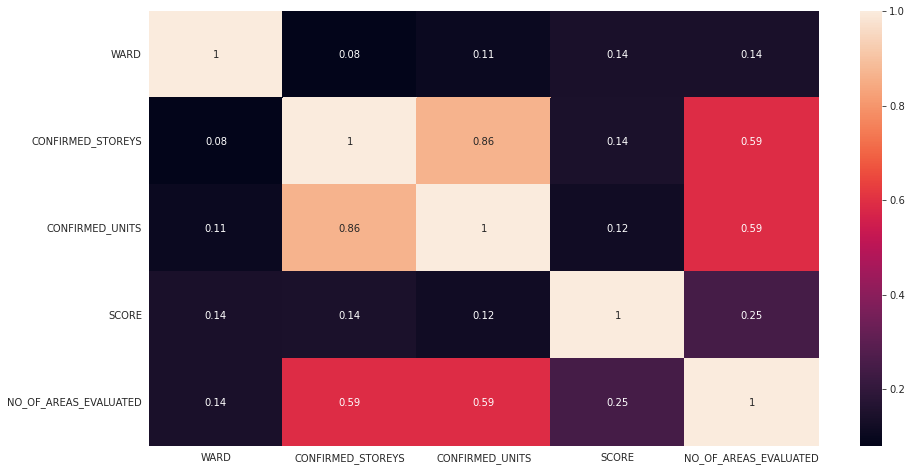

In [ ]:
fig, ax= plt.subplots(figsize=(15,8))
sns.heatmap(apb_corr, annot=True)
plt.show()

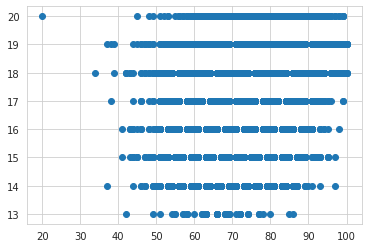

In [ ]:
plt.scatter(apb.SCORE,apb.NO_OF_AREAS_EVALUATED	)
plt.show()

Frequency

In [ ]:
def frenquency(y):
    pd.options.display.float_format= '{:.2f}'.format 
    import math
    y=y.to_numpy() 
    data=y

    K=1+3.322*math.log10(len(data))

    periods=math.ceil(K) 
    inf= data.min() 
    dif=data.max()
    sup= data.max()+1

    Intervals= pd.interval_range(
        start=inf,
        end=sup,
        periods=periods,
        name="Intervals",
        closed="left"
    )

    td= pd.DataFrame(index=Intervals)
    td["Absolute_Frecuency"]=pd.cut(data,bins=td.index).value_counts()
    td["Relative_Frecuency"]=pd.cut(data,bins=td.index).value_counts()/len(y)*100
    return td

In [ ]:
y=apb.SCORE
td= frenquency(y)
td

,Absolute_Frecuency,Relative_Frecuency
Intervals,,
"[20.0, 25.4)",1,0.01
"[25.4, 30.8)",0,0.00
"[30.8, 36.2)",1,0.01
"[36.2, 41.6)",8,0.08
"[41.6, 47.0)",37,0.37
"[47.0, 52.400000000000006)",147,1.49
"[52.400000000000006, 57.800000000000004)",446,4.51
"[57.800000000000004, 63.2)",1354,13.68
"[63.2, 68.6)",1613,16.30


# MODELING

In [ ]:
Variable_Numeric =apb.drop(columns=["SCORE",'CONFIRMED_STOREYS'])._get_numeric_data().columns.to_list()
print(Variable_Numeric)

['WARD', 'CONFIRMED_UNITS', 'NO_OF_AREAS_EVALUATED']


In [ ]:
Variable_Category =apb.select_dtypes(include=["category"]).columns.to_list()
print(Variable_Category)

['ENTRANCE_LOBBY', 'ENTRANCE_DOORS_WINDOWS', 'SECURITY', 'STAIRWELLS', 'INTERNAL_GUARDS_HANDRAILS', 'GARBAGE_BIN_STORAGE_AREA', 'INTERIOR_WALL_CEILING_FLOOR', 'INTERIOR_LIGHTING_LEVELS', 'GRAFFITI', 'EXTERIOR_CLADDING', 'EXTERIOR_GROUNDS', 'EXTERIOR_WALKWAYS', 'WATER_PEN_EXT_BLDG_ELEMENTS']


In [ ]:
def TableX(df,Variable_Numeric,Variable_Category):
  pb_df=df

  if Variable_Category != [] :
    pb_df_dummies=pd.get_dummies(pb_df[Variable_Category],drop_first=True)
    X=pd.concat([pb_df_dummies,pb_df[Variable_Numeric]],axis=1,sort=False)
  else:
    X=pb_df[Variable_Numeric].apply
  return X 

In [ ]:
X=TableX(apb,Variable_Numeric,Variable_Category)

In [ ]:
X.shape

(9897, 55)

In [ ]:
y=apb.SCORE

In [ ]:
from sklearn.model_selection import  train_test_split
x_train,x_test,y_train,y_test= train_test_split(X,y,train_size=0.70) 

Variable Selection

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression,chi2,mutual_info_regression,mutual_info_classif

In [ ]:
X_Select=X
best_Variables=SelectKBest(score_func= f_regression,k=X_Select.shape[1])
fit=best_Variables.fit(X,y)
scores=pd.DataFrame(fit.scores_)
Columns=pd.DataFrame(X_Select.columns)
df_complete=pd.concat([Columns,scores],axis=1)
df_complete.columns=["Variables","scores"]
TD=df_complete.nlargest(15,"scores")
ModelsVariables=TD.Variables.to_list()
ModelsVariables

['SECURITY_5.0',
 'ENTRANCE_LOBBY_3.0',
 'ENTRANCE_DOORS_WINDOWS_3.0',
 'EXTERIOR_GROUNDS_3.0',
 'ENTRANCE_LOBBY_5.0',
 'EXTERIOR_WALKWAYS_3.0',
 'INTERIOR_LIGHTING_LEVELS_5.0',
 'SECURITY_3.0',
 'EXTERIOR_CLADDING_3.0',
 'STAIRWELLS_4.0',
 'WATER_PEN_EXT_BLDG_ELEMENTS_3.0',
 'ENTRANCE_DOORS_WINDOWS_5.0',
 'EXTERIOR_GROUNDS_4.0',
 'INTERNAL_GUARDS_HANDRAILS_5.0',
 'INTERIOR_WALL_CEILING_FLOOR_4.0']

In [ ]:
Decision_Tree_Variable=['SECURITY_5.0',
 'EXTERIOR_GROUNDS_4.0',
 'ENTRANCE_LOBBY_5.0',
 'STAIRWELLS_4.0',
 'ENTRANCE_LOBBY_3.0',
 'EXTERIOR_GROUNDS_3.0',
 'INTERIOR_WALL_CEILING_FLOOR_4.0',
 'EXTERIOR_CLADDING_3.0']

Multiple Regression Model

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.iolib import summary2

In [ ]:
x_train_1=sm.add_constant(x_train[Decision_Tree_Variable],prepend=True) 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Summary Model

In [ ]:
Multiple_Regresion=sm.OLS(endog=y_train,exog=x_train_1).fit()

print(Multiple_Regresion.summary2())

                        Results: Ordinary least squares
Model:                   OLS                  Adj. R-squared:         0.685     
Dependent Variable:      SCORE                AIC:                    43736.5347
Date:                    2022-08-24 17:35     BIC:                    43798.1234
No. Observations:        6927                 Log-Likelihood:         -21859.   
Df Model:                8                    F-statistic:            1882.     
Df Residuals:            6918                 Prob (F-statistic):     0.00      
R-squared:               0.685                Scale:                  32.290    
--------------------------------------------------------------------------------
                                 Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
--------------------------------------------------------------------------------
const                           69.5350   0.2448 283.9934 0.0000 69.0550 70.0149
SECURITY_5.0                     5.5360   0.1597  34.

In [ ]:
x_test_1=sm.add_constant(x_test[Decision_Tree_Variable],prepend=True)
x_test_1.head(2)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,SECURITY_5.0,EXTERIOR_GROUNDS_4.0,ENTRANCE_LOBBY_5.0,STAIRWELLS_4.0,ENTRANCE_LOBBY_3.0,EXTERIOR_GROUNDS_3.0,INTERIOR_WALL_CEILING_FLOOR_4.0,EXTERIOR_CLADDING_3.0
9608,1.00,0,0,0,0,1,1,0,1
3157,1.00,1,1,0,1,0,0,1,0


## Multiple Regresion predict 

In [ ]:
prediction_RM=Multiple_Regresion.predict(exog=x_test_1)

In [ ]:
prediction_RM

9608   60.79
3157   84.17
7829   64.19
4574   80.51
5906   60.79
        ... 
9292   65.07
8884   64.36
1255   77.58
7270   63.72
7341   78.64
Length: 2970, dtype: float64

In [ ]:
y_test

9608    57
3157    85
7829    56
4574    78
5906    59
        ..
9292    69
8884    69
1255    69
7270    69
7341    73
Name: SCORE, Length: 2970, dtype: int64

In [ ]:
def MAPE(y_actual,y_predict):
    mape=np.mean(abs(y_actual-y_predict))/np.mean(y_actual)
    mape=round(mape*100,2)
    return mape

In [ ]:
Mape2=MAPE(y_test,prediction_RM)
Mape2

5.65

In [ ]:
from sklearn.metrics import  mean_squared_error
RMSE_RM= np.sqrt(mean_squared_error(y_test,prediction_RM))
print(RMSE_RM)

5.532017028831493


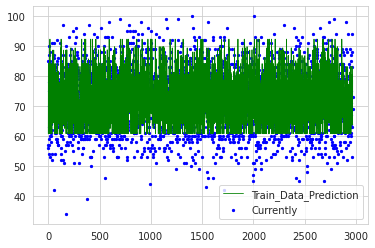

In [ ]:
x_ax= range(len(y_test))
plt.scatter(x_ax,y_test,s=5,color="blue",label="Currently")
plt.plot(x_ax,prediction_RM,lw=0.8,color="green",label="Train_Data_Prediction")
plt.legend()
plt.show()

# # All Variable Decision Tree

In [ ]:
from sklearn.tree import  DecisionTreeRegressor
from sklearn.tree import  plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [ ]:
Model_AVDT=DecisionTreeRegressor(random_state=123)

In [ ]:
x_train1=x_train[Decision_Tree_Variable]
x_test1=x_test[Decision_Tree_Variable]

In [ ]:
Model_AVDT.fit(x_train1,y_train)

DecisionTreeRegressor(random_state=123)

In [ ]:
x_train1=x_train[Decision_Tree_Variable]
x_test1=x_test[Decision_Tree_Variable]

# Regression Tree

In [ ]:
Regression_Tree = DecisionTreeRegressor(random_state=123)

In [ ]:
Regression_Tree.fit(x_train1,y_train)

DecisionTreeRegressor(random_state=123)

In [ ]:
import pydotplus

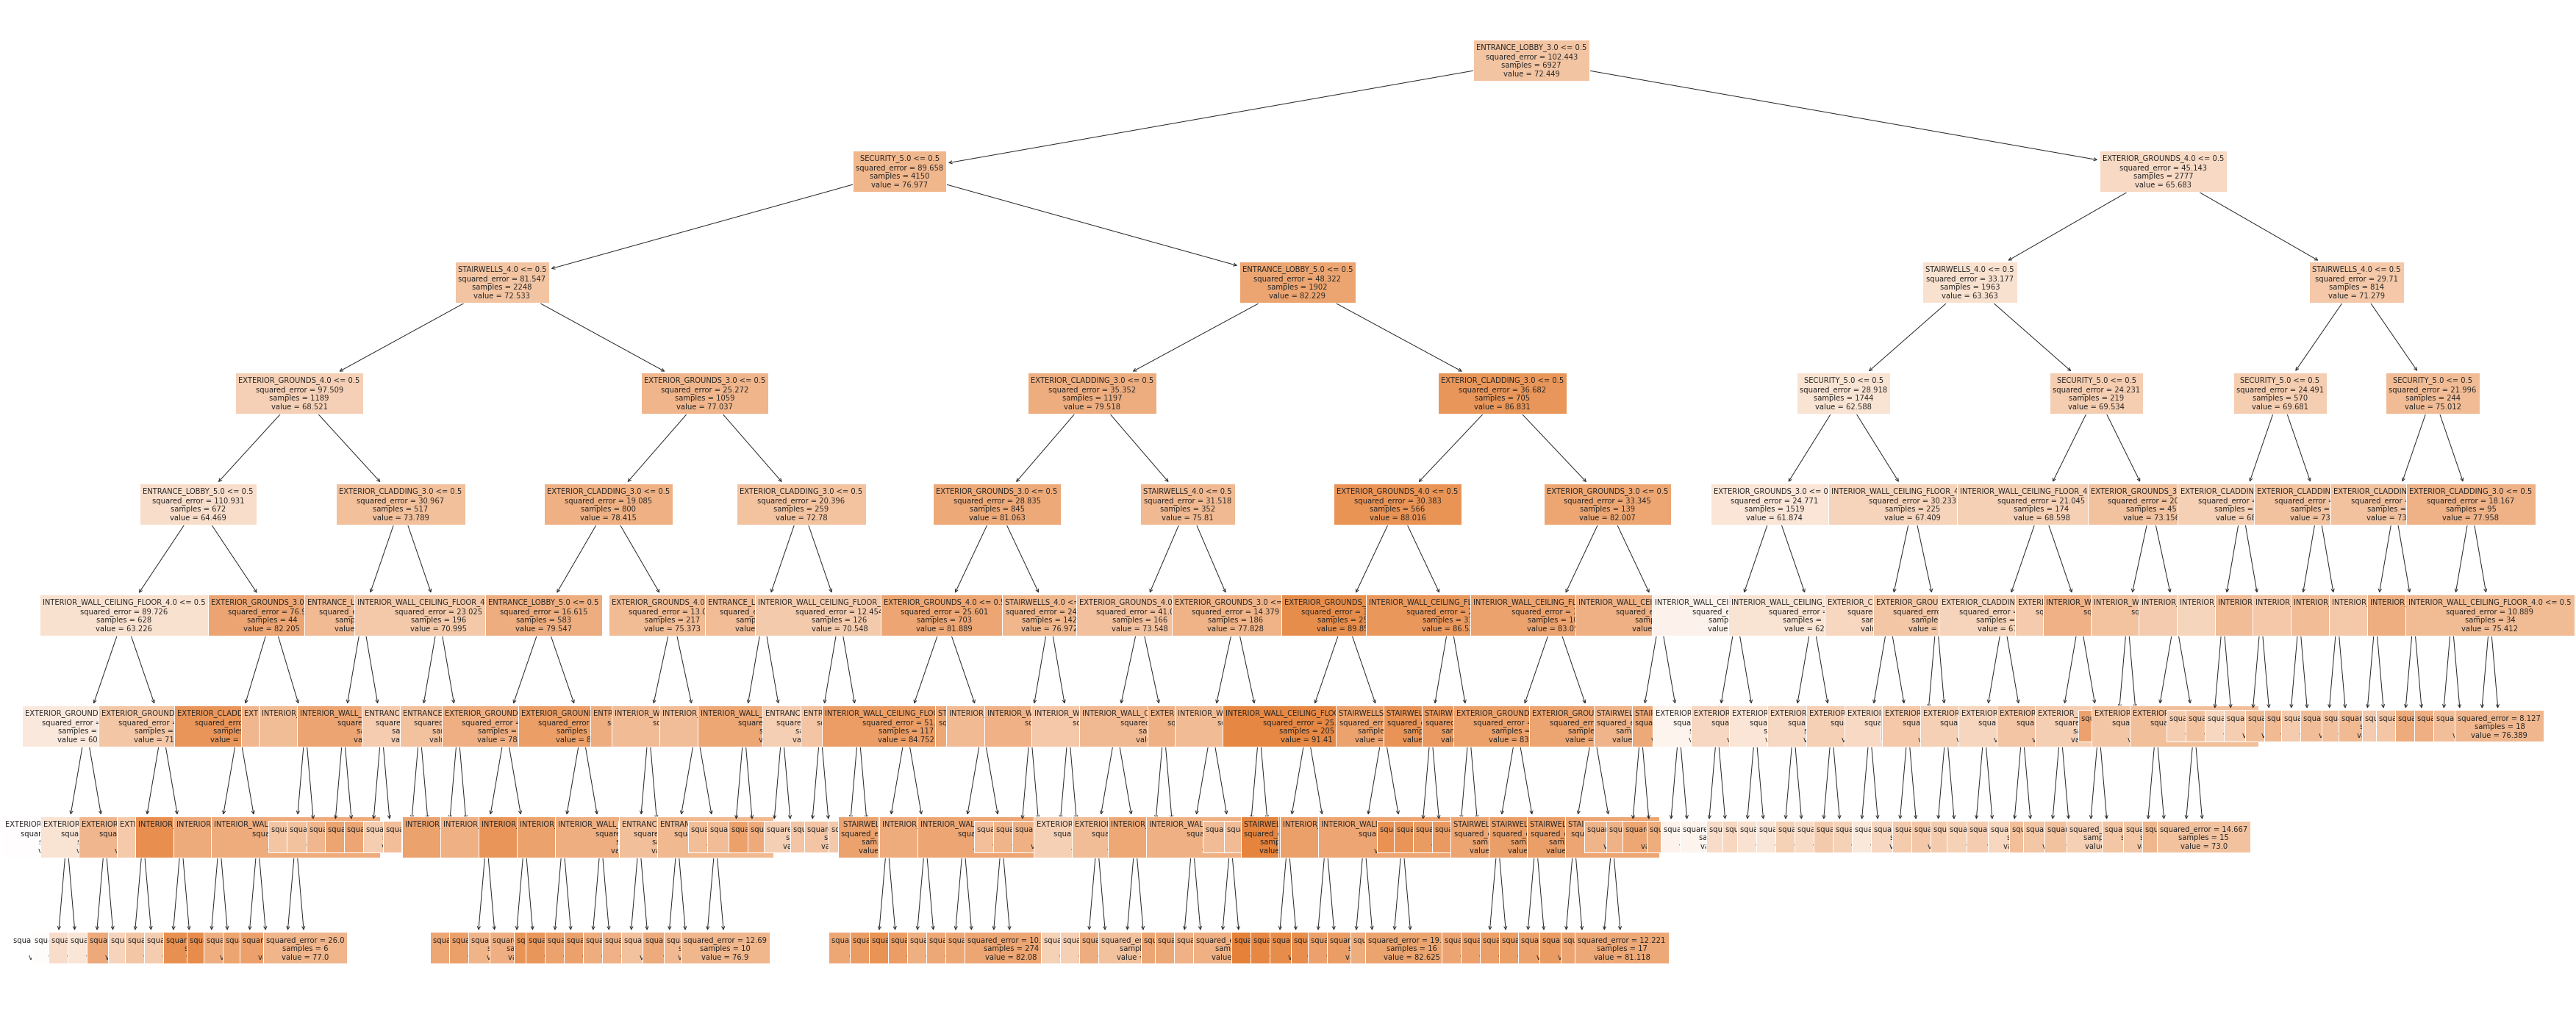

In [ ]:
fig,ax= plt.subplots(figsize=(60,25))
plot= plot_tree(decision_tree=Regression_Tree,
               feature_names=x_train1.columns,
               class_names="SCORE",
                filled=True,
               fontsize=10)

In [ ]:
fig.savefig("RegressionTree1.pdf", bbox_inches='tight')

In [ ]:
main_Variable=pd.DataFrame({"X":x_train1.columns,
                                   "Y": Regression_Tree.feature_importances_})

In [ ]:
main_Variable.sort_values("Y",ascending=False).head(8).X.to_list()

['ENTRANCE_LOBBY_3.0',
 'SECURITY_5.0',
 'EXTERIOR_GROUNDS_4.0',
 'STAIRWELLS_4.0',
 'ENTRANCE_LOBBY_5.0',
 'EXTERIOR_GROUNDS_3.0',
 'EXTERIOR_CLADDING_3.0',
 'INTERIOR_WALL_CEILING_FLOOR_4.0']

In [ ]:
predictionsAD= Regression_Tree.predict(X=x_test1)
MAPE_AR=MAPE(y_test,predictionsAD)
MAPE_AR

4.86

In [ ]:
RMSE_AD= np.sqrt(mean_squared_error(y_test,predictionsAD))
print(RMSE_AD)

4.734189290673752


# Decesion Tree Optimization# New Section

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [ ]:
f=Regression_Tree
max_depth= range(1,20,3)
min_samples_leaf=range(1,10,2)
param_grid=dict(max_depth=max_depth,min_samples_leaf=min_samples_leaf)
kfold=KFold(n_splits=5,shuffle=False,random_state=None)
grid_search=GridSearchCV(Regression_Tree,param_grid=param_grid,cv=kfold, n_jobs = -1,verbose=0)
grid_result = grid_search.fit(x_train1, y_train)
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))

Best: 0.772016 using {'max_depth': 10, 'min_samples_leaf': 3}


In [ ]:
Op_Tree=DecisionTreeRegressor(criterion='mse',
                                    max_depth=10, # Profundidad Optima
                                    min_samples_leaf=3,
                                             random_state=123)
Op_Tree.fit(x_train1, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


DecisionTreeRegressor(criterion='mse', max_depth=10, min_samples_leaf=3,
                      random_state=123)

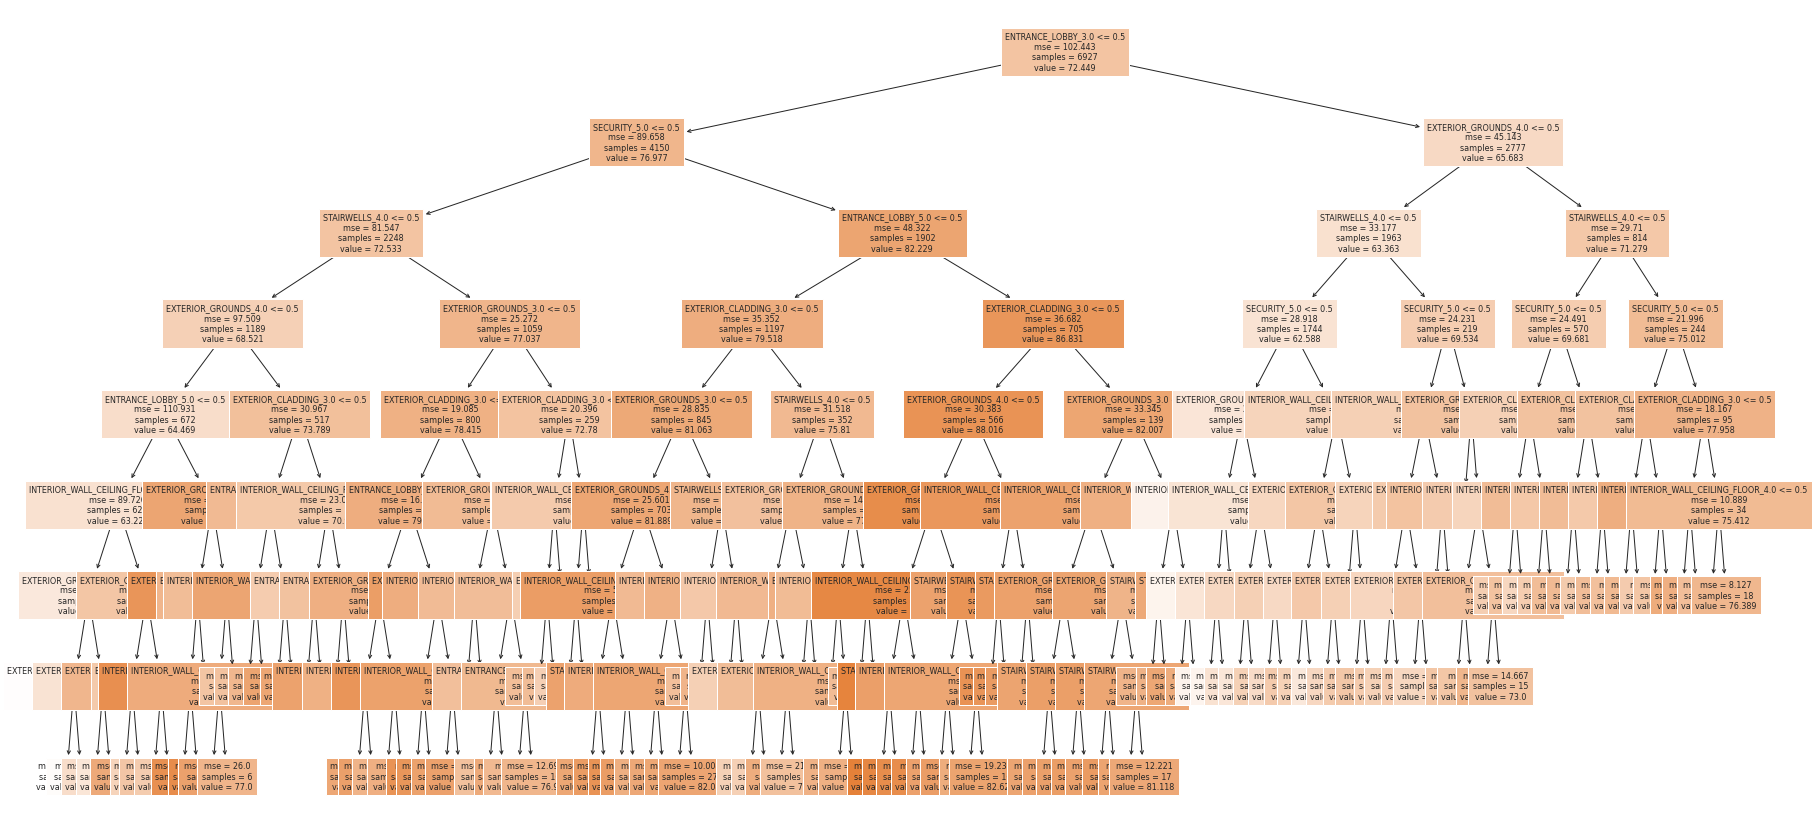

In [ ]:
fig,ax= plt.subplots(figsize=(30,15))
plot= plot_tree(decision_tree=Op_Tree,
               feature_names=x_train1.columns,
               class_names="SCORE",
                filled=True,
               fontsize=8)

In [ ]:
fig.savefig("OP_Tree.pdf", bbox_inches='tight')

In [ ]:
predictionsAD=Op_Tree.predict(X=x_test1)
MAPE_AR1=MAPE(y_test,predictionsAD)
MAPE_AR1

4.86

In [ ]:
RMSE_AD= np.sqrt(mean_squared_error(y_test,predictionsAD))
print(RMSE_AD)

4.732653755290031


# Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
Model_RF = RandomForestRegressor(
            n_estimators = 500,
            criterion    = 'mse',
            max_depth    = None,
            max_features = 'auto',
            n_jobs       = -1,
            random_state = 123
         )

In [ ]:
Model_RF.fit(x_train1,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


RandomForestRegressor(criterion='mse', n_estimators=500, n_jobs=-1,
                      random_state=123)

In [ ]:
prediction= Model_RF.predict(X=x_test1)
MAPE_RF=MAPE(y_test,prediction)
MAPE_RF

4.86

In [ ]:
RMSE_RF= np.sqrt(mean_squared_error(y_test,prediction))
print(RMSE_RF)

4.734524325781571


# Random Forest optimization

In [ ]:
import multiprocessing
from sklearn.model_selection import RepeatedKFold
param_grid = {'n_estimators': [100],
              'max_features': [5, 7],
              'max_depth'   : [3, 10],
              
             }

grid = GridSearchCV(
        estimator  = RandomForestClassifier(random_state = 123),
        param_grid = param_grid,
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits=5, n_repeats=3, random_state=123), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = x_train1, y = y_train)

GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=5, random_state=123),
             estimator=RandomForestClassifier(random_state=123), n_jobs=1,
             param_grid={'max_depth': [3, 10], 'max_features': [5, 7],
                         'n_estimators': [100]},
             return_train_score=True)

In [ ]:
Final_RF_Model = grid.best_estimator_

In [ ]:
prediction =Final_RF_Model.predict(x_test1)

In [ ]:
prediction = Final_RF_Model.predict(X=x_test1)
MAPE_RF1=MAPE(y_test,prediction)
MAPE_RF1

5.39

In [ ]:
RMSE_RF1= np.sqrt(mean_squared_error(y_test,prediction))
print(RMSE_RF1)

5.420624040012827


# Models Results

In [ ]:
Results=pd.DataFrame({"Models":["MultipleRegresion","DecissionTree","DecissionTreeOpt","RandomForest","RandomForestOPT"],
                                         "Mape":[Mape2,MAPE_AR,MAPE_AR1,MAPE_RF,MAPE_RF1],
                                          "RMSE":[RMSE_RM,RMSE_AD,RMSE_AD,RMSE_RF,RMSE_RF1]})

In [ ]:
Results.sort_values("Mape",ascending=True)

,Models,Mape,RMSE
1,DecissionTree,4.86,4.73
2,DecissionTreeOpt,4.86,4.73
3,RandomForest,4.86,4.73
4,RandomForestOPT,5.39,5.42
0,MultipleRegresion,5.65,5.53


In this modeling analysis of *Aparment Building Evaluation* the best model is the DecissionTree 